In [104]:
from config import (gkey, weather_api_key)
import pandas as pd
import random
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import requests
import gmaps
import json

In [160]:
# import city list
city_df = pd.read_json("../Resources/city.list.json")

# ramdomly select 600 cities over the world
random.seed(43)
index = random.sample(range(len(city_df)),50)
selected_city = city_df.iloc[index,:]

In [167]:
# set up params and base url for get requests
params ={
    "appid":weather_api_key,
    "units":"Imperial"
}
# create df to store requested information
weather_df = pd.DataFrame(columns=["City","Country","Lat","Lng","Temperature (F)"
                                  ,"Humidity","Cloudiness","Wind Speed"])

base_url = "http://api.openweathermap.org/data/2.5/weather"

for index, row in selected_city.iterrows():
    # append city to params
    city_name = f"{row[1]},{row[3]}"
    params["q"] = city_name
    
    # get requests
    response = requests.get(base_url,params= params).json()    
    
    try:
        # store values in df
        weather_df.loc[index,"City"] = response["name"]
        weather_df.loc[index,"Country"] = response["sys"]["country"]
        weather_df.loc[index,"Lat"] = float(response["coord"]["lat"])
        weather_df.loc[index,"Lng"] = response["coord"]["lon"]
        weather_df.loc[index,"Temperature (F)"] = float(response["main"]["temp"])
        weather_df.loc[index,"Humidity"] = response["main"]["humidity"]
        weather_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index,"Wind Speed"] = response["wind"]["speed"]
        
#         print(f"Requesting weather information for {city_name}...")
        
    except:
        print(f"Missing {city_name} field/result... skipping.")
#     print("===================================================")

Missing Budeşti,RO field/result... skipping.


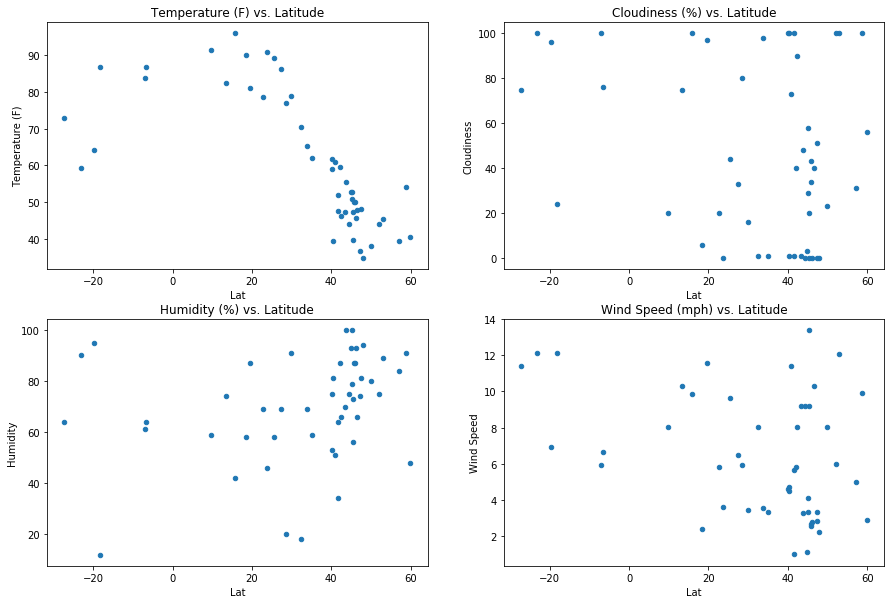

In [168]:
# plot
fig = plt.figure(figsize=(15,10))
axes = fig.subplots(nrows=2, ncols=2)
weather_df.plot.scatter(x ="Lat", y = "Temperature (F)", title = "Temperature (F) vs. Latitude", ax = axes[0,0])
weather_df.plot.scatter(x ="Lat", y = "Humidity", title = "Humidity (%) vs. Latitude", ax = axes[1,0])
weather_df.plot.scatter(x ="Lat", y = "Cloudiness", title = "Cloudiness (%) vs. Latitude", ax = axes[0,1])
weather_df.plot.scatter(x ="Lat", y = "Wind Speed", title = "Wind Speed (mph) vs. Latitude", ax = axes[1,1])

plt.show()

In [97]:
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    "appid":weather_api_key,
    "q":"Los Angeles ",
    "units":"metric",
    "lang":"en"
}

response = requests.get(base_url, params = params).json()

pprint(response)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 34.05, 'lon': -118.24},
 'dt': 1588810246,
 'id': 5368361,
 'main': {'feels_like': 27.41,
          'humidity': 18,
          'pressure': 1011,
          'temp': 30.63,
          'temp_max': 34,
          'temp_min': 24},
 'name': 'Los Angeles',
 'sys': {'country': 'US',
         'id': 3694,
         'sunrise': 1588769896,
         'sunset': 1588819245,
         'type': 1},
 'timezone': -25200,
 'visibility': 9656,
 'weather': [{'description': 'haze', 'icon': '50d', 'id': 721, 'main': 'Haze'}],
 'wind': {'deg': 250, 'speed': 2.6}}


In [154]:
weather_df

,City,Country,Lat,Lng,Temperature (F),Humidity,Cloudiness,Wind Speed
10106,Fedorovskoye,RU,58.82,42.54,53.42,92,100,8.77
74995,Willofs,DE,47.88,10.43,34.18,93,0,2.24
182511,Nola,IT,40.92,14.53,62.15,48,39,13.87
199933,Świątniki Górne,PL,49.93,19.95,44.35,81,0,9.17
37731,Corella,PH,9.69,123.92,86,74,40,8.05
121250,Piadena,IT,45.13,10.37,55.33,73,25,4.79
96961,Tence,FR,45.12,4.29,49.75,87,69,1.12
176068,Palladuc,FR,45.9,3.63,50,93,12,2.24
183091,Lawitz,DE,52.11,14.64,44.04,59,100,1.99
207867,Sambilawang,ID,-6.66,111.1,81,78,82,7.54


In [40]:
test.loc[test["country"]=="US",:]

,id,name,state,country,coord
141897,4046255,Bay Minette,AL,US,"{'lon': -87.773048, 'lat': 30.882959}"
141898,4046274,Edna,TX,US,"{'lon': -96.646088, 'lat': 28.97859}"
141899,4046319,Bayou La Batre,AL,US,"{'lon': -88.24852, 'lat': 30.403521}"
141900,4046332,Henderson,TX,US,"{'lon': -94.799377, 'lat': 32.153221}"
141901,4046430,Natalia,TX,US,"{'lon': -98.862534, 'lat': 29.18968}"
...,...,...,...,...,...
208905,8122840,Western Community Park,KS,US,"{'lon': -97.680717, 'lat': 38.367432}"
208906,8122866,Happy Homes Park,KS,US,"{'lon': -99.976273, 'lat': 37.7458}"
208907,8123060,Western Mobile Home Park South,KS,US,"{'lon': -100.939072, 'lat': 37.03735}"
209568,8260172,West Greenwich,RI,US,"{'lon': -71.660042, 'lat': 41.637001}"
